In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

from scipy import stats

from numpy.random import randn

import matplotlib as mlt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df=pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


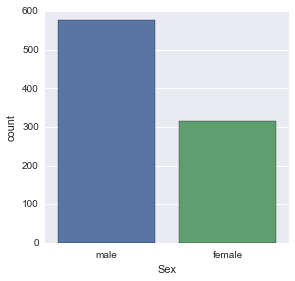

In [5]:
sns.factorplot('Sex', data=titanic_df,kind='count');

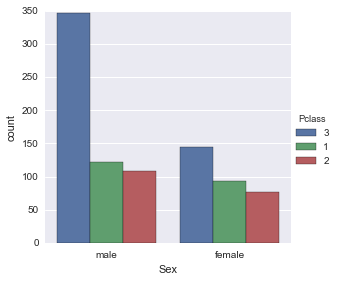

In [6]:
sns.factorplot('Sex', data=titanic_df,hue='Pclass',kind='count');

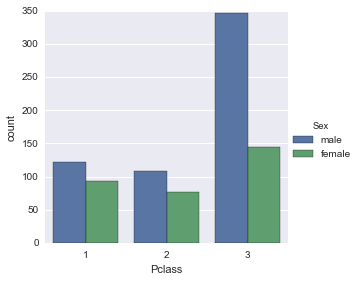

In [7]:
sns.factorplot('Pclass', data=titanic_df,hue='Sex',kind='count',order=[1,2,3]);

In [8]:
def male_female_child(passenger):
    [age,sex]=passenger
    
    if age<16:
        return 'child'
    else:
        return sex

In [9]:
titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [10]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


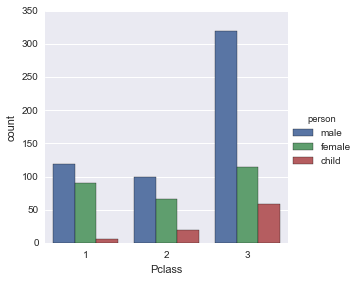

In [11]:
sns.factorplot('Pclass',data=titanic_df,hue='person',kind='count',order=[1,2,3])

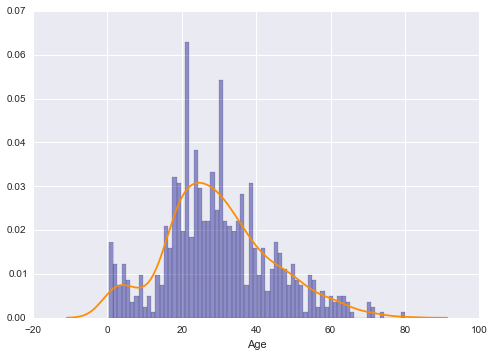

In [12]:
sns.distplot(titanic_df[titanic_df['Age']>0]['Age'],bins=70,
            kde_kws={'color':'darkorange'},
            hist_kws={'color':'darkblue'})

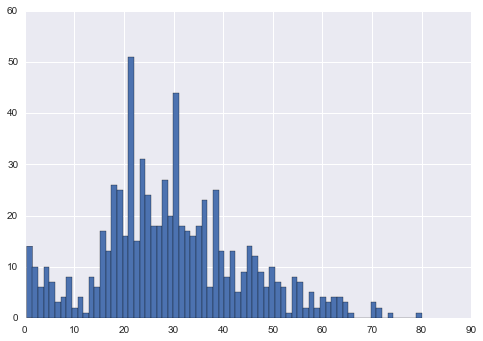

In [13]:
titanic_df['Age'].hist(bins=70)

In [14]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
dtype: int64

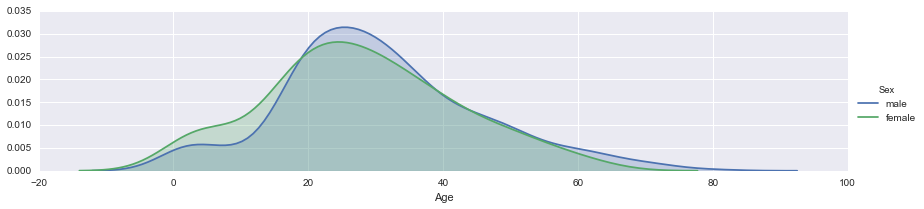

In [16]:
fig=sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest=titanic_df['Age'].max()
xlim=[0,oldest]
fig.add_legend()

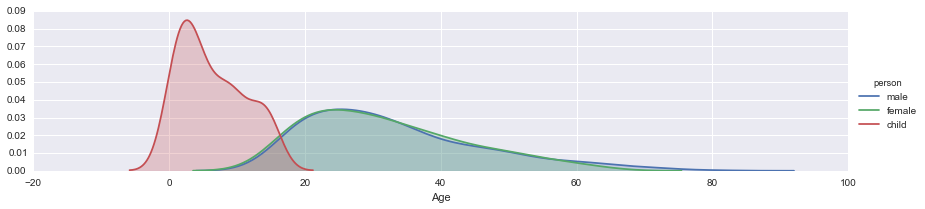

In [17]:
fig=sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest=titanic_df['Age'].max()
xlim=[0,oldest]
fig.add_legend()

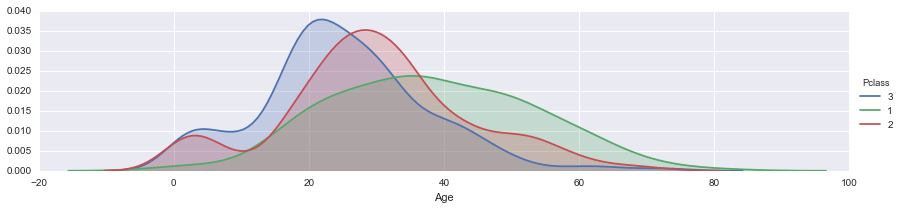

In [18]:
fig=sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest=titanic_df['Age'].max()
xlim=[0,oldest]
fig.add_legend()

In [19]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [20]:
deck=titanic_df['Cabin'].dropna()

In [21]:
fetchdeck(titanic_df['Cabin'][3])

NameError: name 'fetchdeck' is not defined

In [23]:
def fetchdeck(cabin):
    if pd.isnull(cabin) is True:
        return cabin
    else:
        return cabin[0]

In [24]:
titanic_df['deck']=titanic_df['Cabin'].apply(fetchdeck)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child,NaN


In [ ]:
sns.factorplot('deck',data=titanic_df,hue='Pclass',kind='count',order=['A','B','C','D','E','F','G'],aspect=2.5)

In [ ]:
titanic_df.head(10)

In [ ]:
titanic_df.groupby(titanic_df['Embarked']).size()

In [ ]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',kind='count',x_order=['C','Q','S'],hue_order=[1,2,3])

In [ ]:
titanic_df.head()

In [ ]:
titanic_df['Alone']=titanic_df['SibSp']+titanic_df['Parch']

In [ ]:
titanic_df.head()

In [ ]:
titanic_df['Alone'].loc[titanic_df['Alone']>0]='With Family'

titanic_df['Alone'].loc[titanic_df['Alone']==0]='Alone'



In [ ]:
titanic_df.head()

In [43]:
def ifalone(passanger):
    [SibSp,Parch]=passanger
    if SibSp+Parch>0:
        return 'With Family'
    else:
        return 'Alone'

In [44]:
titanic_df['Alone']=titanic_df[['SibSp','Parch']].apply(ifalone,axis=1)


In [ ]:
titanic_df.head(10)

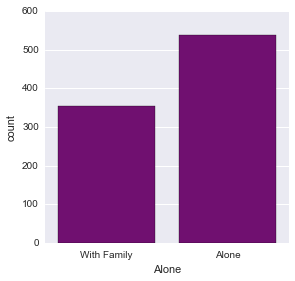

In [45]:
sns.factorplot('Alone',data=titanic_df,kind='count',color='purple')

In [46]:
titanic_df['Survivor']=titanic_df.Survived.map({0:'No',1:'Yes'})

In [ ]:
titanic_df.head()

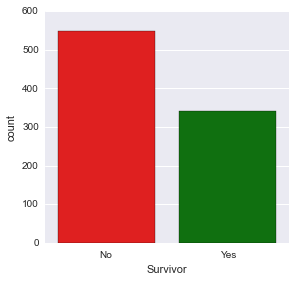

In [47]:
sns.factorplot('Survivor',data=titanic_df,kind='count',palette=['Red','Green'])

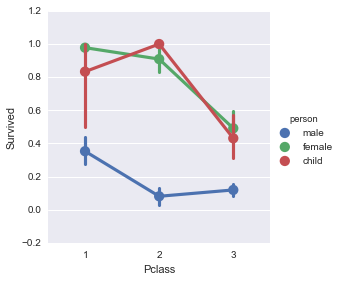

In [48]:
sns.factorplot('Pclass','Survived',data=titanic_df,hue='person',order=[1,2,3])

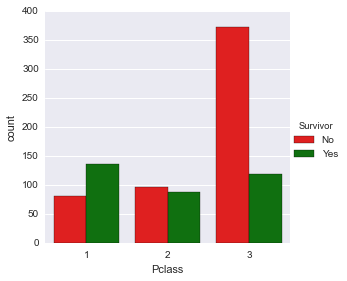

In [49]:
sns.factorplot('Pclass',data=titanic_df,hue='Survivor',kind='count',order=[1,2,3],palette=['Red','Green'])

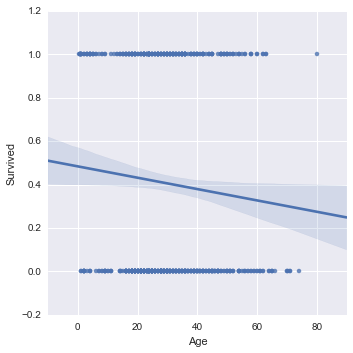

In [50]:
sns.lmplot('Age','Survived',titanic_df,)

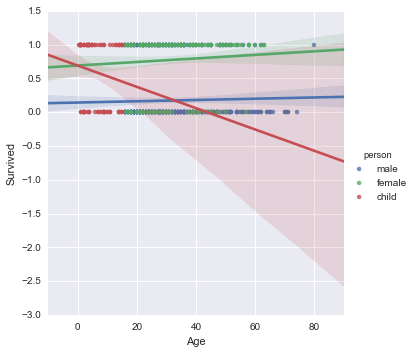

In [51]:
sns.lmplot('Age','Survived',data=titanic_df,hue='person')

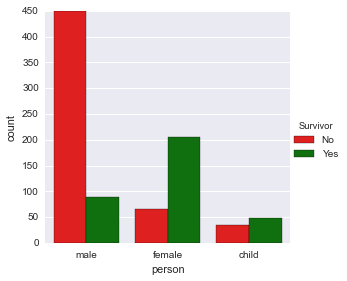

In [52]:
sns.factorplot('person',data=titanic_df,hue='Survivor',kind='count',palette=['Red','Green'])

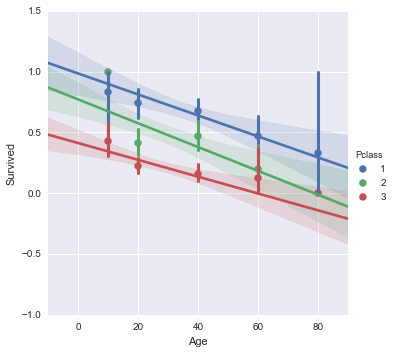

In [53]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=generations,hue_order=[1,2,3])

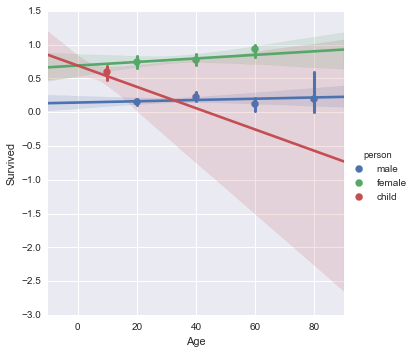

In [54]:
sns.lmplot('Age','Survived',data=titanic_df,hue='person',x_bins=generations)

In [25]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,NaN


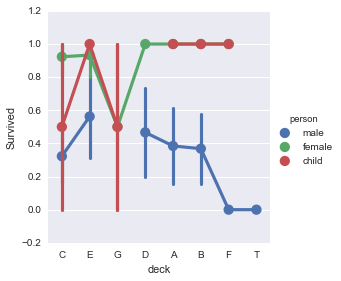

In [27]:
sns.factorplot('deck','Survived',data=titanic_df,hue='person')

In [30]:
titanic_df.groupby(['deck','Survived','person'])

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  \
deck Survived person                                                      
A    0        male              8       8     8    8    5      8      8   
     1        child             1       1     1    1    1      1      1   
              female            1       1     1    1    1      1      1   
              male              5       5     5    5    5      5      5   
B    0        male             12      12    12   12   11     12     12   
     1        child             3       3     3    3    3      3      3   
              female           25      25    25   25   24     25     25   
              male              7       7     7    7    7      7      7   
C    0        child             1       1     1    1    1      1      1   
              female            2       2     2    2    2      2      2   
              male             21      21    21   21   18     21     21   
     1        child             1       1     1    1    1      1      1   
              female           24      24    24   24   22     24     24   
              male             10      10    10   10    7     10     10   
D    0        male              8       8     8    8    8      8      8   
     1        female           18      18    18   18   17     18     18   
              male              7       7     7    7    6      7      7   
E    0        female            1       1     1    1    1      1      1   
              male              7       7     7    7    7      7      7   
     1        child             1       1     1    1    1      1      1   
              female           14      14    14   14   12     14     14   
              male              9       9     9    9    9      9      9   
F    0        male              5       5     5    5    4      5      5   
     1        child             4       4     4    4    4      4      4   
              female            4       4     4    4    3      4      4   
G    0        child             1       1     1    1    1      1      1   
              female            1       1     1    1    1      1      1   
     1        child             1       1     1    1    1      1      1   
              female            1       1     1    1    1      1      1   
T    0        male              1       1     1    1    1      1      1   

                      Ticket  Fare  Cabin  Embarked  
deck Survived person                                 
A    0        male         8     8      8         8  
     1        child        1     1      1         1  
              female       1     1      1         1  
              male         5     5      5         5  
B    0        male        12    12     12        12  
     1        child        3     3      3         3  
              female      25    25     25        23  
              male         7     7      7         7  
C    0        child        1     1      1         1  
              female       2     2      2         2  
              male        21    21     21        21  
     1        child        1     1      1         1  
              female      24    24     24        24  
              male        10    10     10        10  
D    0        male         8     8      8         8  
     1        female      18    18     18        18  
              male         7     7      7         7  
E    0        female       1     1      1         1  
              male         7     7      7         7  
     1        child        1     1      1         1  
              female      14    14     14        14  
              male         9     9      9         9  
F    0        male         5     5      5         5  
     1        child        4     4      4         4  
              female       4     4      4         4  
G    0        child        1     1      1         1  
              female       1     1      1         1  
     1        child        1     1      1         1  
 

In [36]:
pd.crosstab(titanic_df.deck,[titanic_df.person,titanic_df.Survived])

person   child    female     male    
Survived     0  1      0   1    0   1
deck                                 
A            0  1      0   1    8   5
B            0  3      0  25   12   7
C            1  1      2  24   21  10
D            0  0      0  18    8   7
E            0  1      1  14    7   9
F            0  4      0   4    5   0
G            1  1      1   1    0   0
T            0  0      0   0    1   0

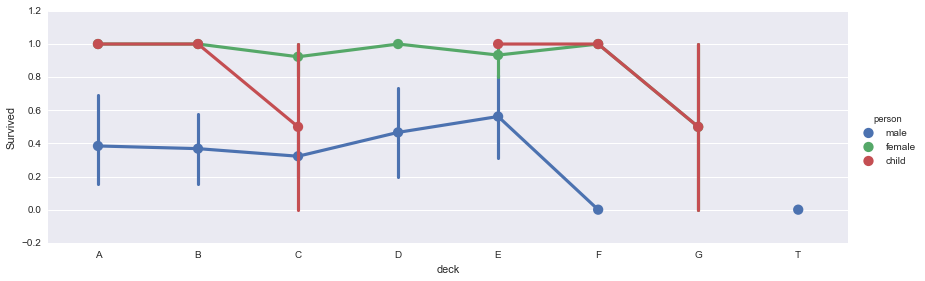

In [40]:
sns.factorplot('deck','Survived',data=titanic_df,hue='person',aspect=3,x_order=['A','B','C','D','E','F','G','T'])

#Though The Deck Number doesn't have much impact on survival.But significantly in the F desk, No men survived while all women and childern survived. 

In [55]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,deck,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,NaN,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,C,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,C,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,NaN,Alone,No


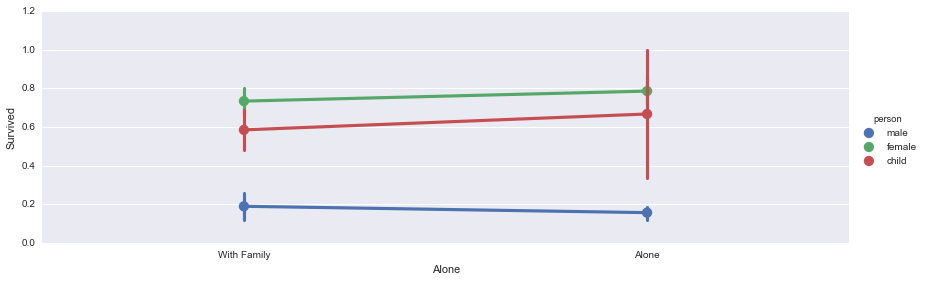

In [64]:
sns.factorplot('Alone','Survived',hue='person',data=titanic_df,aspect=3)

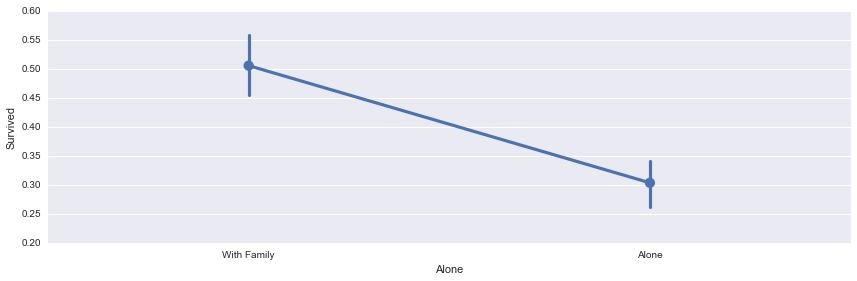

In [65]:
sns.factorplot('Alone','Survived',data=titanic_df,aspect=3)

In [67]:
pd.crosstab(titanic_df.Alone,[titanic_df.Survived,titanic_df.person])

Survived        0                 1            
person      child female male child female male
Alone                                          
Alone           2     26  346     4     95   64
With Family    32     40  103    45    110   24